# 简单线性回归（最小二乘法）

### 0.引入依赖

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### 1.导入数据（data.csv）

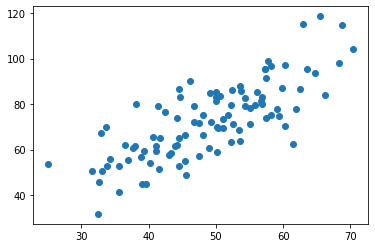

In [10]:
points = np.genfromtxt('data.csv' , delimiter = ',')
points[0,0]

#提取points中的两列分别作为X 和Y
x = points[:,0]
y = points[:,1]
# 用plt画出散点图
plt.scatter(x,y)
plt.show()


### 2.定义损失函数

In [26]:
#损失函数是系数的函数，另外传入数据的x,y
def computer_cost(w, b, points):
    total_cost = 0
    M = len(points)
    #逐点计算平方损失误差
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += ( y-w*x-b)**2
        
    return total_cost/M

### 3.定义算法你和函数

In [13]:
#先定义求均值的函数
def average(data):
    sum = 0
    num = len(data)
    for i in range(num):
        sum += data[i]
    return sum/num

#定义核心你和函数
def fit(points):
    M = len(points)
    x_bar = average(points[:, 0])
    
    sum_yx = 0
    sum_x2 = 0
    sum_delta = 0
    
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        sum_yx += y*(x-x_bar)
        sum_x2 += x**2
    w = sum_yx/(sum_x2-M*(x_bar**2))
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        sum_delta += (y-w*x)
    b = sum_delta/M
    return w, b

### 4.测试

In [27]:
w, b = fit(points)

print("w is",w)
print("b is",b)

cost = computer_cost(w, b, points)
print("cost is",cost)

w is 1.3224310227553846
b is 7.991020982269173
cost is 110.25738346621313


### 5.画出你和曲线

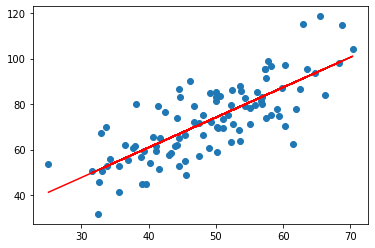

In [28]:
plt.scatter(x,y)
#针对每一个x，计算出预测的y值
pred_y = w*x+b
plt.plot(x, pred_y,c='r')
plt.show()